- we have two types of scaling
  - Z score (standardization)
  - Min Max scalar (Normalization)

**Z score (standardization)**

<img src="https://www.simplypsychology.org/wp-content/uploads/Z-score-formula.jpg" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 435px; height: 249px; margin: 0px; width: 305px;" alt="Z-Score: Definition, Formula, Calculation &amp; Interpretation" jsname="kn3ccd">

**Min Max scalar (Normalization)**

<img src="https://miro.medium.com/v2/resize:fit:1030/1*zuf6Ju67IgXY9QT_RSTkyw.png" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 515px; height: 177px; margin: 0px; width: 305px;" alt="Understanding Data Scaling: Min-Max Scaling vs ..." jsname="kn3ccd">

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv(r"C:\Users\Amma\Documents\NareshIT\DataFiles\Visadataset.csv")

cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [2]:
# step-1: take the prevailing wage data
# step-2: calculate mean of the data
# step-3: calculate the sd of data
# step-4: Numerator=data-mean (step1 - step2)
# step-5: z-wage=Nr/sd (step4/step3)
# step-6: Create a new column visa_df['z_wage']=z_wage

In [12]:
pwage=visa_df['prevailing_wage']
pmean=pwage.mean()
pstd=pwage.std()
Nr=pwage-pmean
z_Wage=Nr/pstd
visa_df['z_Wage']=z_Wage

In [13]:
visa_df[['prevailing_wage','z_Wage']]

,prevailing_wage,z_Wage
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


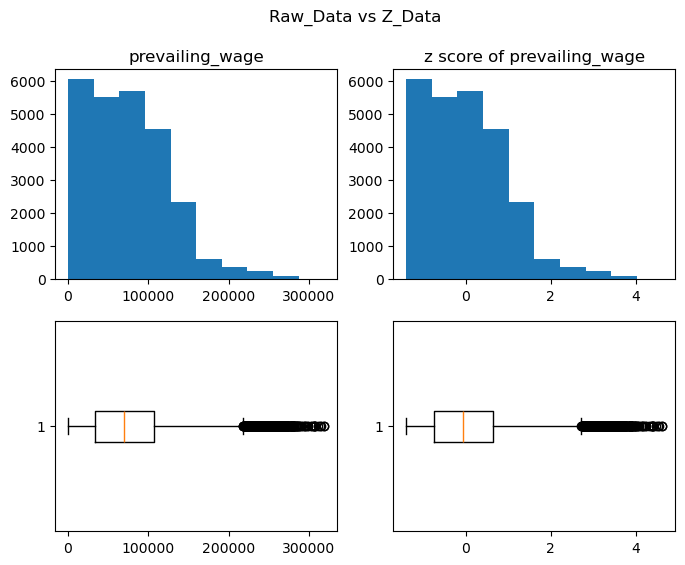

In [23]:
plt.figure(figsize=(8,6))
plt.suptitle('Raw_Data vs Z_Data')
plt.subplot(2,2,1).hist(pwage)
plt.title('prevailing_wage')
plt.subplot(2,2,2).hist(z_Wage)
plt.title('z score of prevailing_wage')
plt.subplot(2,2,3).boxplot(pwage, vert=False)
plt.subplot(2,2,4).boxplot(z_Wage, vert=False)
plt.show()

**STANDARD SCALAR**

- sklearn
  - preprocessing
    - Standard scalar

In [ ]:
# step-1: import method
# step-2: save the method
# step-3: apply fit transform

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
wage_ss=ss.fit_transform(visa_df[['prevailing_wage']])
visa_df['wage_ss']=wage_ss
wage_ss

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

In [ ]:
# visa_df['prevailing_wage'] # to get data in series
# visa_df[['prevailing_wage']] # to get data for DataFrame

In [30]:
# checking all values at a place
visa_df[['prevailing_wage','z_Wage','wage_ss']]

,prevailing_wage,z_Wage,wage_ss
0,-1.398537,-1.398510,-1.398537
1,0.169835,0.169832,0.169835
2,0.919079,0.919060,0.919079
3,0.169994,0.169991,0.169994
4,1.428604,1.428576,1.428604
...,...,...,...
25475,0.049924,0.049923,0.049924
25476,3.876159,3.876083,3.876159
25477,1.360280,1.360253,1.360280
25478,0.221509,0.221504,0.221509


In [ ]:
visa_df # gives total data
visa_df['prevailing_wage'] # give one column info
visa_df['prevailing_wage'].values # 
visa_df[['prevailing_wage']]

In [33]:
visa_df
visa_df['prevailing_wage']
visa_df['prevailing_wage'].values
visa_df['prevailing_wage'].values.reshape(-1,1)

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

In [34]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
wage_ss=ss.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))
visa_df['wage_ss']=wage_ss
wage_ss

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

**MIN-MAX SCALAR**

<img src="https://miro.medium.com/v2/resize:fit:1030/1*zuf6Ju67IgXY9QT_RSTkyw.png" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 515px; height: 177px; margin: 0px; width: 305px;" alt="Understanding Data Scaling: Min-Max Scaling vs ..." jsname="kn3ccd">

In [38]:
# step-1: read the data
# steo-2: calculate min
# step-3: calculate max
# step-4: Numerator(Nr)=step1-step2
# step-5: Denominator(Dr)=step3-step2
# step-6: Nr/Dr
# step-7: visa_df['wage_min_max']=Nr/Dr

visa_df=pd.read_csv(r"C:\Users\Amma\Documents\NareshIT\DataFiles\Visadataset.csv")
pwage=visa_df['prevailing_wage']
pmin=pwage.min()
pmax=pwage.max()
Nr=pwage-pmin
Dr=pmax-pmin
res=Nr/Dr
min_max_val=visa_df['wage_min_max']=res
min_max_val

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: prevailing_wage, Length: 25480, dtype: float64

In [40]:
max(res), min(res)

(1.0, 0.0)

In [41]:
# step-1: import the method
# step-2: save the method
# step-3: apply fit transform

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit_transform(visa_df['prevailing_wage'].values.reshape(-1,1))

array([[0.00184853],
       [0.2613452 ],
       [0.385312  ],
       ...,
       [0.45831136],
       [0.26989486],
       [0.22203311]])